지도 학습의 문제는 '회귀'와 '분류'의 문제로 나눌 수 있습니다. 회귀는 입력에 대해 연속적인 값을 대응시키는 문제이며, 분류는 입력에 대해 순서가 없는 클래스(라벨)를 대응시키는 문제입니다.

파이썬 배열 변수의 인덱스 순서에 맞추어, N개의 데이터에 0에서 $N-1$까지의 숫자를 할당합니다.

이때, $x_n$을 '입력 변수', $t_n$를 '목표 변수(대상)'이라고 합니다. $n$은 각 개인을 나타내는 데이터의 인덱스입니다.모든 데이터를 정리한 $x$를 '입력데이터', $y$를 '목표데이터' 라고 부르기로 합니다. 목적은 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 $t$를 예측하는 것입니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(seed=1) # 난수를 고정 -> 동일한 난수 시퀀스 생성 -> 동일한 결과
X_min = 4 # X 하한
X_max = 30 # X 상한
X_n = 16 # X 개수
X = 5+25*np.random.rand(X_n) # 5 <= x <= 30
Prm_c = [170, 108, 0.2] # 생성 매개 변수
# T = 170 - 108^(-0.2X) + 4*np.random.randn(X_n)
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X)\
+4*np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [ ]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


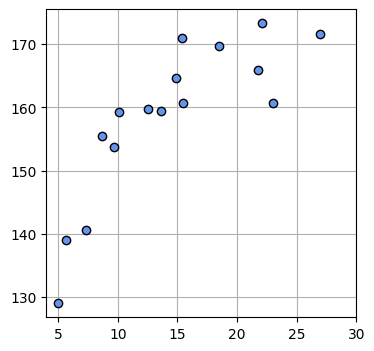

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

그림을 보면 데이터가 고르지 않기 때문에, 새로운 나이 데이터에 키를 정확히 맞추기는 불가능합니다. 하지만 어느정도 오차를 허용하면 주어진 데이터에 직선을 긋는 것으로, 그럴듯하게 예측할 수 있습니다.
직선의 방정식은 다음과 같이 나타낼 수 있습니다.

$y(x) = w_0x+w_1$

기울기를 나타내는 $w_0$, 절편을 나타내는 $w_1$에 적당한 값을 넣으면, 다양한 위치와 기울기의 직선을 만들 수 있습니다. 이 수식은 입력 $x$에 $y(x)$를 출력하는 함수로 볼 수 있으므로, $y(x)$는 $x$에 대한 $y$의 예측치로 간주할 수 있습니다.

'데이터에 부합하도록' 오차 $J$를 정의합시다.

$J = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1}{(y_n-t_n)^2}$

여기서 $y_n$은 직선 모델에 $x_n$을 넣었을 때의 출력을 나타냅니다.

$y_n = y(x_n) = w_0x_n + w_1$

$J$는 평균 제곱 오차 mean square error, MSE로, 직선과 데이터 점의 차이 제곱의 평균입니다. MSE를 $N$으로 나누지 않는 제곱 합계 오차 sum-of-squares error도 존재합니다. 어느 경우든 도출되는 결론은 동일합니다. 제곱 합계 오차 SSE를 사용하면 오차의 크기가 N에 의존합니다.

$SSE = \displaystyle\sum_{n=0}^{N-1}{(y_n-t_n)^2}$

SSE
- SSE는 데이터 세트의 크기를 반영하기 때문에, 데이터의 양이 변할 때 오차의 절대적 크기 변화를 직접적으로 평가할 수 있습니다.
- 데이터 세트의 크기에 따라 SSE 값이 달라지므로, 모델의 성능을 고립적으로 평가하기 어렵습니다. 이는 모델을 다른 상황에 적용하거나 다른 모델과 공정하게 비교하는 데 제약을 줄 수 있습니다.

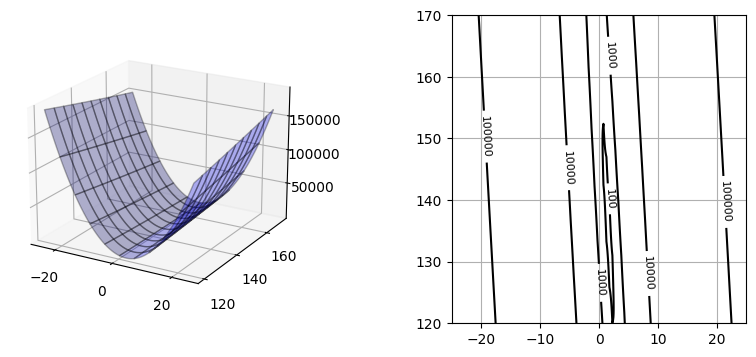

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# MSE
def mse_line(x, t, w):
  y = w[0] * x + w[1]
  mse = np.mean((y-t)**2)
  return mse

# 계산
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(-25, 25, xn)
x1 = np.linspace(120, 170, xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

그림에서와 같이 $w$ 공간에서의 평균 제곱 오차는 마치 계곡과 같은 모양을 하고 있습니다. 직선의 절편을 나타내는 $w_1$는 120cm에서 170cm까지의 50의 범위를 설정하였으므로, 직선의 기울기를 나타내는 $w_0$에서도 -25에서 25까지의 50의 범위를 설정합니다.

실제 그래프를 보면 $w_0$방향의 변화에 $J$가 크게 변하는 것을 알 수 있습니다. 기울기가 조금이라도 바뀌면 직선이 데이터 점에서 크게 어긋나기 때문입니다. 그러나 3D 그래프는 $w_1$ 방향의 변화를 알기 힘듭니다. 그래서 등고선의 그래프도 오른쪽에 표시했습니다. 그러면 계곡의 바닥도 절편 $w_1$ 방향으로 높이가 변화하는 것으로 나타납니다. 아무래도 $w_0 = 3, w_1 = 135$ 근처에서 $J$가 최솟값을 취할 것 같습니다.

그럼 $J$가 가장 작아지는 $w_0$과 $w_1$은 어떻게 구할까요? 가장 간단하고 기본적인 방법은 경사 하강법입니다.
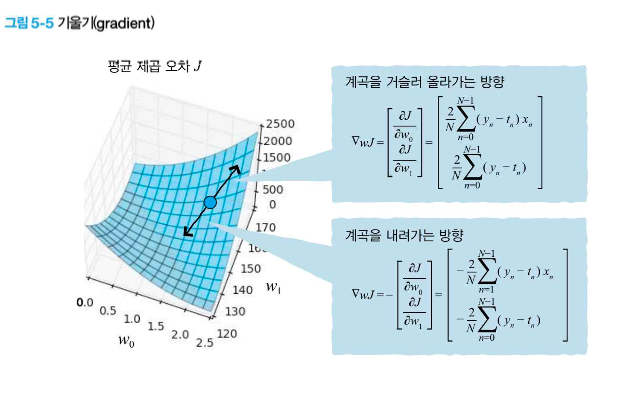

우선 초기 위치로 적당한 $w_0$과 $w_1$를 결정합니다. 이것은 $J$ 지형 위의 한 지점에 대응합니다. 이 점에서의 기울기를 확인하고 $J$가 가장 감소하는 방향으로 $w_0$과 $w_1$를 조금만 진행합니다. 이 절차를 여러 번 반복하여 최종적으로 J가 가장 작아지는 '그릇의 바닥'인 $w_0$과 $w_1$에 도착할 수 있습니다.

어느 지점($w_0$, $w_1$)에 서서 주위를 빙 둘러봤을 때, 언덕의 위쪽 방향은 J를 $w_0$과 $w_1$로 편미분한 벡터 $\begin{bmatrix}\frac{\delta{J}}{\delta{w_0}}\\ \frac{\delta{J}}{\delta{w_0}}\end{bmatrix}^T$로 표시됩니다. 이것을 $J$의 기울기로 부르며, $\nabla{wJ}$로 나타냅니다. $J$를 최소화하려면 $J$으 기울기의 반대 방향
$-\nabla{wJ} =\begin{bmatrix}\frac{\delta{J}}{\delta{w_0}}\\ \frac{\delta{J}}{\delta{w_0}}\end{bmatrix}^T$으로 진행하면 좋을 것 입니다.
$w$의 갱신 방법(학습 법칙)을 행렬 표기로 나타내면 아래와 같습니다.

$w(t+1) = w(t) - \alpha\nabla_w|_{w(t)}$

일반적으로 $\nabla{wJ}는 {w}$의 함수입니다. 이 $w$의 값 $w(t)$를 대입한 값을 $\nabla{J}|w(t)$로 표시했습니다. 이 벡터가 지금 있는 지점 $w(t)$의 기울기를 나타내게 됩니다. $\alpha$는 학습율이라고 불니는 양수 값을 취하는 매개 변수로, $w$ 갱신의 폭을 조정합니다. 큰 편이 갱신은 커지지만, 수습이 어려워지므로 적당히 줄여야 합니다.

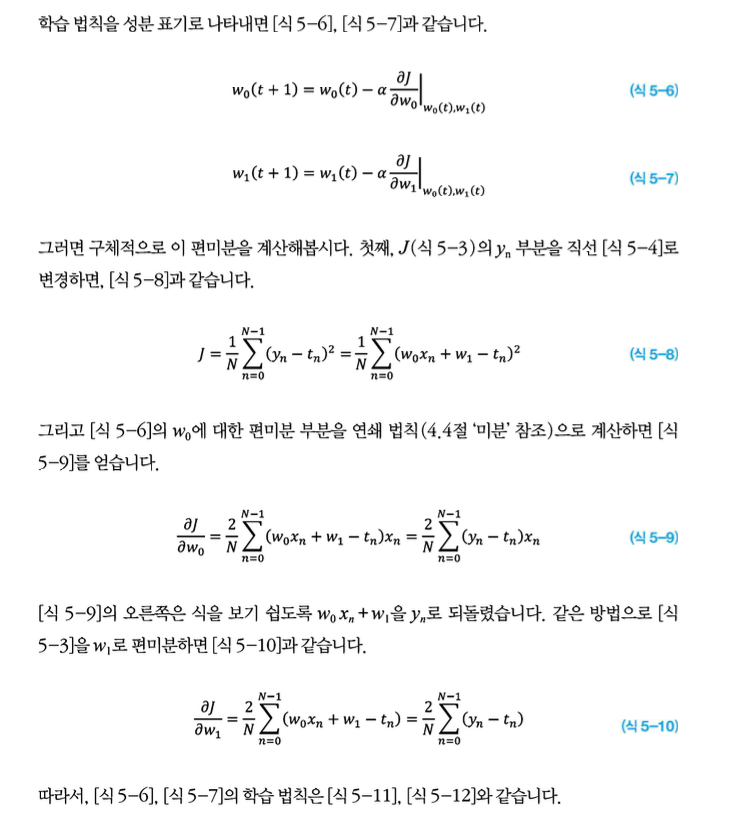
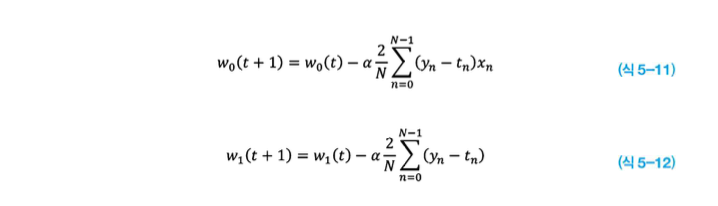

학습 법칙이 구체적으로 나타났으므로, 이것을 프로그램으로 구현하여 봅시다. 먼저 기울기를 계산하는 함수 dmse_line(x,t,w)를 만듭니다. 인수 데이터 x, t 및 매개 변수 w를 전달하면 w의 기울기 d_w0, d_w1를 돌려줍니다.
시험 삼아 w = [10, 165]의 기울기를 구해봅시다.

In [ ]:
def dmse_line(x, t, w):
  y = w[0] * x + w[1]
  d_w0 = 2 * np.mean((y-t) * x)
  d_w1 = 2 * np.mean(y-t)
  return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


차례로 $w_0$ 방향과 $w_1$ 방향의 기울기를 나타냅니다. 둘 다 꽤 큰 기울기입니다. 또한 $w_0$ 방향의 기울기는 $w_1$ 방향의 기울기보다 더 큰 것도 알 수 있습니다.

그럼 이 dmse_line를 사용한 경사 하강법 fit_line_num(x, t)를 구현합시다. fit_line_num(x, t)는 데이터 x, t를 인수로 하여 mse_line을 최소화하는 w를 돌려줍니다. w는 초기 값 w_init = [10.0, 165.0]에서 시작하여 dmse_line에서 구한 기울기 w를 갱신하고 있습니다. 갱신 단계의 폭이 되는 학습 비율은 alpha = 0.001로 했습니다.

w이 평평한 곳에 도달하면(즉 기울기가 충분히 적어지면), w의 갱신을 종료합니다. 구체적으로는 각 요소의 절대 값이 eps = 0.1보다 작으면 for문에서 빠져 나오게 되어 있습니다. 프로그램을 실행하면 마지막으로 얻어진 w 값 등을 표시하고 w의 갱신 내역을 그래포프로 표시합니다.

반복횟수: 13820
W = [1.539947, 136.176160]
dMSE = (-0.005794, 0.099991)
MSE = 49.027452


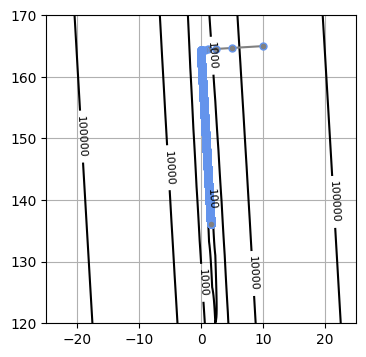

In [ ]:
# 경사 하강법
def fit_line_num(x, t):
  w_init = [10.0, 165.0] # 초기 매개 변수
  alpha = 0.001 # 학습률
  i_max = 100000 # 반복의 최대 수
  eps = 0.1 # 반복 종료 기울기의 절대값의 한계
  w_i = np.zeros([i_max,2 ])
  w_i[0, :] = w_init
  for i in range(1, i_max):
    dmse = dmse_line(x, t, w_i[i-1])
    w_i[i,0] = w_i[i-1, 0] - alpha * dmse[0]
    w_i[i,1] = w_i[i-1, 1] - alpha * dmse[1]
    if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대값
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i, :]
  return w0, w1, dmse, w_i

plt.figure(figsize=(4,4)) # MSE의 등고선 표시

xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(-25, 25, xn)
x1 = np.linspace(120, 170, xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기
print('반복횟수: {}'.format(W_history.shape[0]))
print('W = [{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE = ({0:.6f}, {1:.6f})'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


평균 제곱 오차 $J$의 등고선 위에 $w$의 갱신의 모습을 푸른 선으로 그리고 있습니다. 처음에는 가파른 계곡으로 진행해 골짜기에 정착하면 계곡의 중앙 부근에 천천히 나아가서 기울기가 거의 없어지는 지점에 도달하는 것을 알 수 있습니다.

그러면 구해 놓은 W0와 W1은 정말 데이터에 있던 절편과 기울기가 될까요? 위에서 구한 W0와 W1의 값을 직선 식에 대입하여 데이터 분포에 겹쳐서 그려본시다.

w0=1.540, w1=136.176
SD=7.002 cm


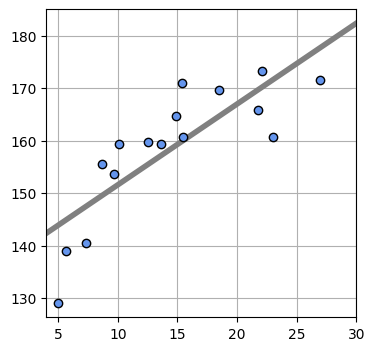

In [ ]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


당연하지만 데이터와 완전히 일치하지 않습니다. 그럼 데이터와 얼마나 차이가 날까요?

이때의 평균 제곱 오차는 $49.03cm^2$였는데, 이는 말 그래도 오차를 제곱하고 있기 때문에, 직관적으로 오차가 얼마나 되는지 잘 알 수 없습니다.
그래서 숫자를 제곱하기 이전으로 복원하기 위해 49.03의 제곱근 $\sqrt{49.03}$을 취합니다. 그러면 7.00cm입니다. 직선과 데이터의 차이는 대략 7.00cm라는 것입니다. 직관적인 수치가 되었습니다. 그래프를 봐도 직선과 데이터의 오차는 대략 그 정도임을 확인할 수 있습니다.

이 평균 제곱 오차의 제곱근을 표준 편차 standard deviation, SD라고 합니다. '오차가 대략 7.00cm'라는 의미를 더 제대로 말하면, "오차가 정규 분포를 따른다고 가정했을 때, 전체의 68%의 데이터 점에서 오차가 7.00cm 이하이다."라는 뜻이 됩니다. 정규 분포의 경우, 평균에서의 차이가 플러스 마이너스 SD의 범위에 분포의 68%가 들어가기 때문입니다.

평균 $\pm$ 1 SD: 데이터의 약 68%가 이 범위 내에 존재

평균 $\pm$ 2 SD: 데이터의 약 95%가 이 범위 내에 존재

평균 $\pm$ 3 SD: 데이터의 약 99.7%가 이 범위 내에 존재

이처럼 $J$의 기울기만 구할 수 있다면, 최소 제곱법으로 극솟값을 구할 수 있습니다.

주의할 점은 일반적으로 경사 하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값은 아니라는 것입니다.
만약 $J$가 곳곳에 움푹 들어간 모양을 하고 있다면, 최소 제곱법으로는 초기값 근처의 함몰 지점(극솟값)에 수렴하게 됩니다.
다양한 초기 값에서 경사 하강법을 여러 번 시도하여, 그 중 가장 $J$가 작아진 지점을 최솟값으로 채용하는 근사적인 방법을 생각할 수 있습니다.

그러나 여기에서 소개한 직선 모델의 경우, $J$가 $w_0$과 $w_1$의 2차 함수로 되어 있기 때문에 J는 함몰이 하나밖에 없는 '그릇형'이 보장됩니다. 따라서 어떤 초기값에서 시작하더라도 학습률을 적절하게 선택해두면, 언제나 전체의 최솟값으로 수렴합니다.

경사 하강법은 반복 계산에 의해 근사값을 구하는 수치 계산법입니다.
이러한 풀이를 수치해라고 합니다. 그러나 사실은 직선 모델의 경우에서는 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구할 수 있습니다.
이러한 풀이를 해석해라고 합니다. 해석해를 사용하면 반복 계산이 아니라 1회 계산으로 최적의 w를 구할 수 있습니다. 계산 시간도 빠르고 답도 정확합니다.
또한 해석해를 도출하면 문제의 본질을 잘 이해할 수 있고, 다차원 데이터에 대응하며, 곡석 모델로 확장하기 좋고, 커널법 등의 이해를 도와줍니다.

- 해석해: 수학적 방정식을 풀어서 직접적으로 매개변수의 최적값을 찾는 방법입니다. 선형 회귀의 cost function은 볼록 함수 이므로, 방정식을 풀어 나온 해가 전역 최소값임이 보장됩니다.
또한 해석해를 도출하면 문제의 본질을 잘 이해할 수 있고, 다차원 데이터에 대응하며, 곡석 모델로 확장하기 좋고, 커널법 등의 이해를 도와줍니다.
- 커널법: region의 부피(크기)(V)를 고정하고 그 안에 몇 개가 들어갈 수 있는지(K)를 찾아냄으로써 확률 밀도를 구하는 방식을 kernel method라고 합니다. SVM
- kernel function: 데이터 u가 h의 길이를 가지는 D dimension 안에 있으면 1, 아니면 0이 되는 함수입니다.

목표는 '$J$가 극소화되는 지점 $w$를 찾기'입니다. 그 지점의 기울기는 0이므로, 기울기가 0이 되는 지점 w, 즉 $\frac{\delta{J}}{\delta{w_0}} = 0$과 $\frac{\delta{J}}{\delta{w_1}} = 0$을 충족하는 $w_0$과 $w_1$을 찾으면 됩니다.

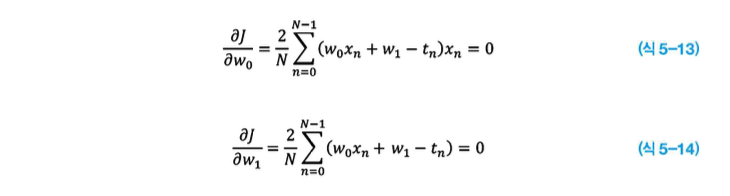

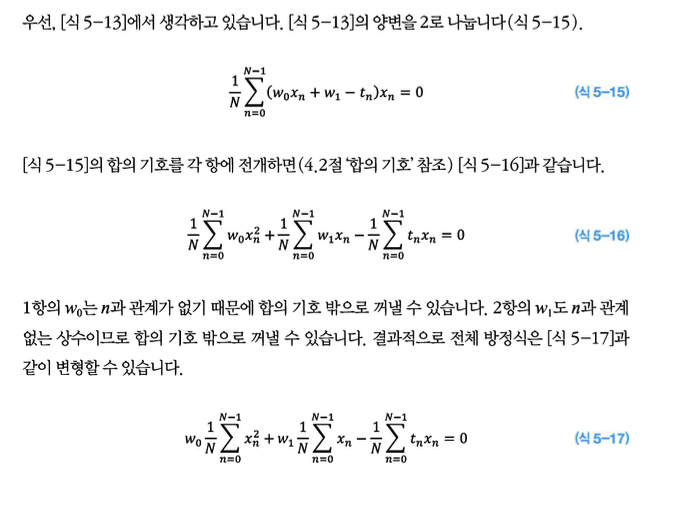

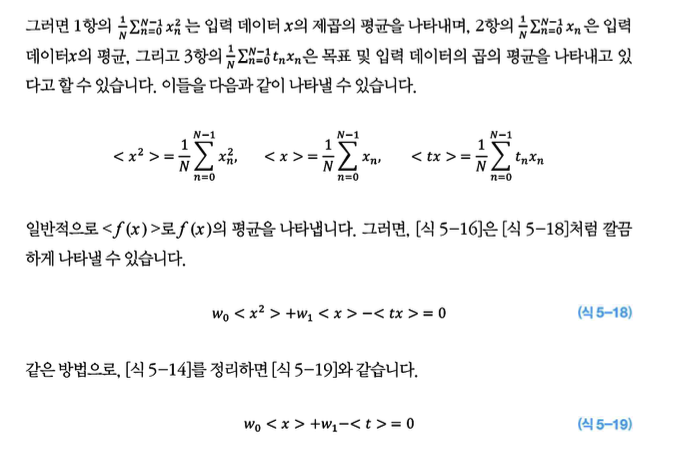

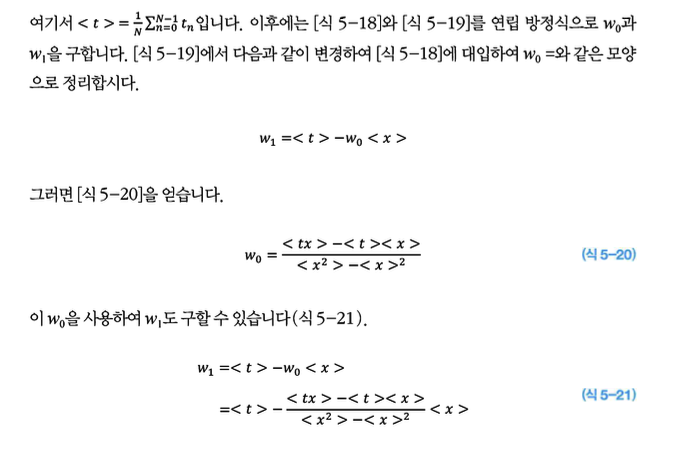

이 [식 5-20], [식 5-21]은 w의 해석해입니다. [식 5-20]분모의 <$x^2$>과 $<x>^2$는 각각 $x^2$의 평균, $<x>^2$은 <$x$>의 제곱입니다.

입력 데이터 X와 목표 데이터 T의 값을 이 식에 넣어 w를 찾아보면, 확실히 경사 하강법과 거의 같은 결과가 얻어집니다.


w0=1.558, w1=135.872
SD=7.001 cm


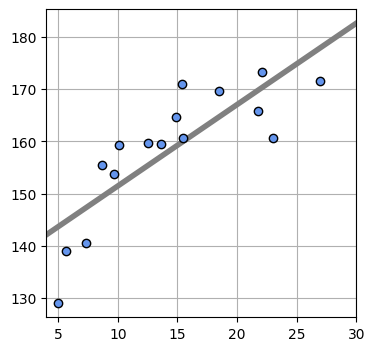

In [ ]:
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

즉, 직선으로 피팅한다면 해석해를 도출할 수 있으므로 경사 하강법을 사용할 필요가 없습니다. 해석해가 구해지지 않는 모델에서 힘을 발휘합니다.

다음은 입력이 2차원인 경우, $x=(x_0,x_1)$에 확장합니다.
1차원의 경우는 $x_n$은 나이만을 의미했지만, 이와 함께 몸무게 정보도 사용하여 키를 예측합니다.

먼저 몸무게의 데이터를 인공적으로 만듭시다.
데이터에 포함되는 사람의 체질량 지수 BMI가 평균 23이라고 가정하여 다음 식을 사용합니다.

$몸무게 = 23\times\frac{키^2}{100}+노이즈$

몸무게는 키의 제곱에 비례한다는 단순한 식입니다.
몸무게 데이터를 생성하는 코드입니다.
원래 나이 $x$를 X0으로, 몸무게의 데이터를 X1로 추가합니다.

In [ ]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T/100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


16명의 X0, X1, T가 생성됩니다. 아래 코드로 3차원 플롯의 그래프를 그려봅시다.

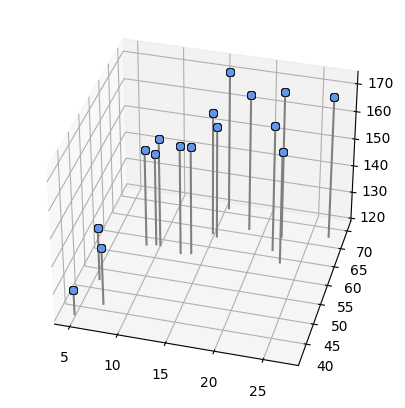

In [ ]:
def show_data2(ax, x0, x1, t):
  for i in range(len(x0)):
    ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
            [120, t[i]], color='gray')
    ax.plot(x0, x1, t, 'o',
            color='cornflowerblue', markeredgecolor='black',
            markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

나이가 많아질수록, 몸무게가 증가할수록 키가 커집니다.

여기에서 수식을 작성할 때의 데이터 표시법을 정리해 둡시다.
데이터의 번호는 이미 $n$으로 나타내었으므로, 벡터의 요소(0=나이, 1=몸무게 등) 번호는 $m$으로 나타내도록 하겠습니다.

데이터 번호 $n$, 요소 번호 $m$의 $x$를 $x_{n,m}$과 같이 오른쪽
아래 첨자로 표시합니다.
데이터 번호 $n$의 모든 $x$의 요소를 쓸 때는 볼드체로, 아래와 같이 나타냅니다. 이는 가로 벡터입니다.

$x_n = \begin{bmatrix}x_{n,0},x_{n,1}\end{bmatrix}$

$x_n$ 이 2차원이 아니라 $M$차원이라면 아래와 같이 나타냅니다.

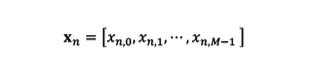

모든 데이터 $n$dmf 보여주는 경우는 아래와 같이 행렬로 나타낼 수 있습니다.

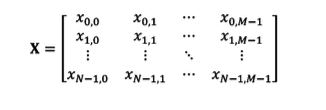

행렬을 나타낼 때는 대문자와 볼드체를 사용합니다.
차원 $m$으로 정리하고 싶을 경우에는 아래와 같이 세로 벡터로 나타낼 수 있습니다.

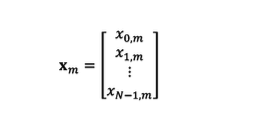

가로 벡터 $x_n$와 구별할 때에는 첨자가 $n$인지, $m$인지로 판정합니다.
또한 첨자에 숫자를 사용할 때, 의미를 알기 어려울 경우에은 $x_{n=1}$
과 $x_{m=0}$등으로 명확하게 합니다.
$t$에 대해서도 모든 $N$으로 정리할 때 아래와 같이 세로 벡터로 나타낼 수 있습니다.

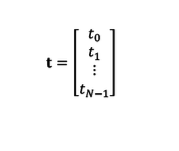

$N$개의 2차원 벡터 $x_n$에 대해, 각각 $t_n$이 할당되어 있으므로
이 관계를 보려면 아래 그림에서 나타낸 바와 같이, 각각의 축에서 $x_{m=0}$과$x_{m=1}$그리고 t를 나타내는 3차원 플롯이 편리합니다. 여기에 선이 아닌 면을 적용하면 새로운 $x = [x_0,x_1]$
에 대해 t의 예측이 가능할 것입니다.

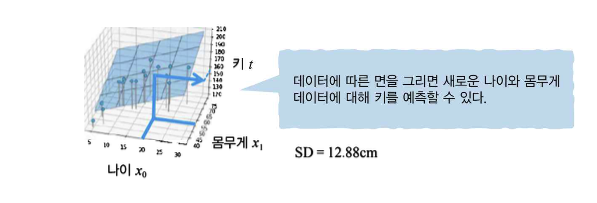

임의의 w에 대해 면을 그리는 함수 show_plane(ax, w)를 준비합니다. ax라는 인수는 3차원 그래프를 그릴 때 필요한 묘사 대상 그래프 id입니다. 평균 제곱 오차를 계산하는 함수 mse_plane(x0, x1, t, w)도 만듭니다.

SD=12.876 cm


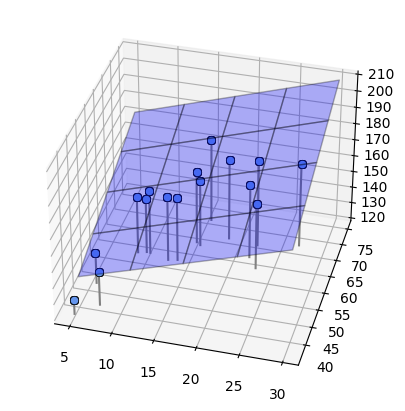

In [ ]:
def show_plane(ax, w):
  px0 = np.linspace(X0_min, X0_max, 5)
  px1 = np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0, px1)
  y = w[0]*px0 + w[1] * px1 + w[2]
  ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                  color='blue', edgecolor='black')

# 면의 MSE
def mse_plane(x0, x1, t, w):
  y = w[0] * x0 + w[1] * x1 + w[2] # (A)
  mse = np.mean((y - t)**2)
  return mse

# 메인
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

이 면의 함수는 아래 식으로 표현됩니다.

$y(x) = w_0x_0 + w_1x_1 + w_2$

$w_0,w_1,w_2$에 다양한 값을 넣어서 여러 위치와 기울기를 가진 면을
나타낼 수 있습니다. 이 함수가 어떻게 면을 표현하는지 상상해봅시다.
이 함수는 $x_0$와$x_1$의 쌍에 대해 $y$를 결정할 수 있습니다.
이때, 좌표 ($x_0,x_1$)에 대한 $y$의 높이, 즉 좌표 ($x_0,x_1,y$)에 점을 찍는 것을 상상합니다.
이 작업을 여러 ($x_0,x_1$)의 쌍으로 반복하면 공간에 많은 점을 찍을
수 있습니다. 이 점의 집합이 '평평한 표면은 형성하는' 것입니다.

그러면 데이터에 가장 적합한 $w=[w_0,w_1,w_2]$를 구해봅시다.
2차원 면 모델의 경우에도 1차원의 선 모델과 마찬가지로 평균 제곱 오차를
아래와 같이 정의할 수 있습니다.

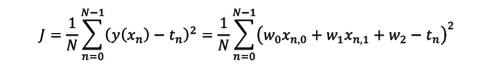

$w$를 움지이면 면이 여러 방향을 향하며, 그에 따라 $J$가 변화합니다.
목표는 $J$가 가장 작아지는 $w=[w_0,w_1,w_2]$를 구하는 것입니다.
$J$를 최소화하는 최적의 $w$는 기울기가 0인, 즉 아주 작은 $w$의
변화에 대해서 $J$의 변화는 0이기 때문에 $J$를 $w_0$으로 편미분한
것은 0이며, 또한 $J$를$w_1$로 편미분한 것도 0이고, $w_2$로 편미분한 것도 0인, 아래와 같은 관계가 성립됩니다.

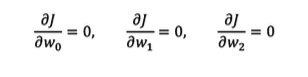

$w_0$에 대한 편미분 식

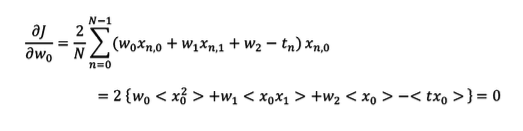

$w_1$에 대한 편미분 식

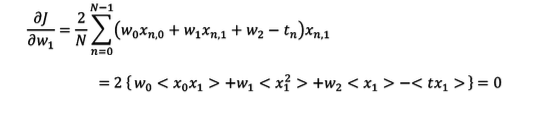

$w_2$에 대한 편미분 식

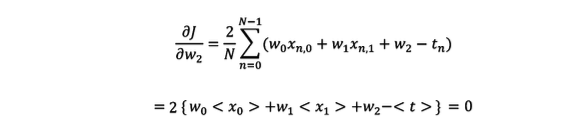

이 3개 식의 연립 방정식을
$w_0, w_1, w_2에 대해 풀면$ 아래 3개의 식을 얻을 수 있습니다.

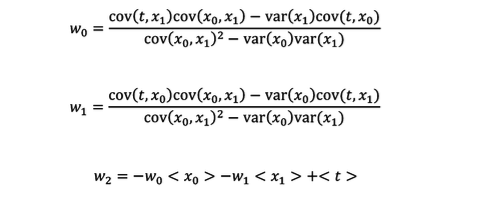

여기에서 $var(a) = <{a^2}> - {<a>}^2$
와 $cov(a,b) = <ab> - <a><b>$로 했습니다. 전자는 $a$의 분산,
후자는 $a$와 $b$의 공분산이라 불리는 통계량입니다.
$a$의 분산이란 $a$와 얼마나 차이가 있는지를 나타내고, $a$와 $b$의 공분산은
$a$와 $b$가 서로 얼마나 영향을 끼치고 있는지를 나타냅니다.
위의 3가지 식에 실제 데이터 X0, X1과 목표 데이터 T의 값을 넣어 $w_0,w_1,w_2$를 구하고, 그 면을 그려봅시다.

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


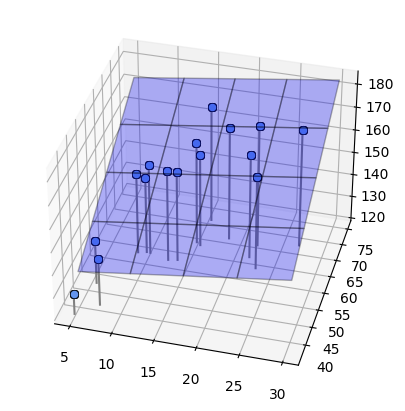

In [ ]:
# 해석해
def fit_plane(x0, x1, t):
  c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
  c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
  c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
  v_x0 = np.var(x0)
  v_x1 = np.var(x1)
  w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
  w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
  w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
  return np.array([w0, w1, w2])


# 메인
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

코드의 실행 결과를 보면 면이 데이터 점에 맞게 배치된 것을 알 수 있습니다.
오차의 표준 편차 SD는 2.55cm로, 지난번의 선 모델일 때의 7.00cm보다
작아졌습니다. 키를 예측할 때 나이뿐 아니라 몸무게 정보가 있는 것이,
예측 정확도가 증가합니다.

그러면 $x$가 3차원, 4차원, 아니 더 큰 차원이면 어떨까요?
다른 차원에 대해 모든 공식을 고려한다면 엄청난 수고가 듭니다.
그래서 $D$차원으로 차원수도 변수로 한 공식을 고려하는 방법을 생각합니다.

1차원 입력에서 다룬 직선 모델, 2차원 입력에서 다룬 면 모델은 모두
선형 회귀 모델이라는 같은 종류의 모델입니다. 일바적으로 아래 식과 같이
나타냅니다.

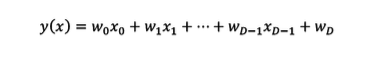

마지막 $w_D$는 절편을 나타내고, $x$가 곱해지지 않은 점에 주의하세요.
우선 쉽게 살펴보기 위해 절펼의 항을 포함하지 않는 모델로 생각합니다.

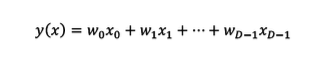

절편 $w_D$가 모델에 포함되지 않으면 어떤 $w$에서도 원전 $x=[0,0,\cdots,0]$을 대입하면 $y$가 0이 됩니다.
즉, 이 모델은 어떤 $w$더라도 원점을 지나는 평면(고차원 공간의 면과 같은 것)
입니다. 절편이 없으면 그래프가 상하로 평행 이동할 수 없기 때문입니다.

이 모델을 행렬 표기법을 사용하여 짧게 정리하면, 아래 식의 오른쪽처럼
$w^Tx$로 나타낼 수 있습니다.

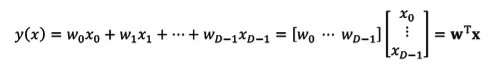

$w$는 다음과 같습니다.

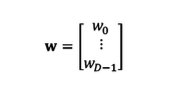

$w^T$은 이를 옆으로 한 가로 벡터입니다.

이제부터 해석해를 구합니다. 지금까지와 마찬가지로 평균 제곱 오차 $J$를
아래 식처럼 나타냅니다.

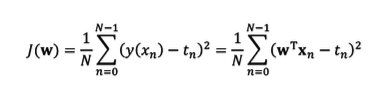

친숙한 연쇄 법칙을 사용하여 $w_i$로 미분하면 아래 식과 같습니다.

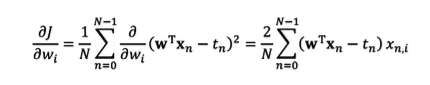

또한 $w^Tx_n = w_0x_{n,0}+\cdots+w_{n,D-1}x_{n,D-1}을$
$w_i$로 미분하면 $x_{n,i}$만 남게 되므로 주의하세요.

$J$를 최소로 만드는 $w$는 모든 $w_i$방향에 대한 기울기가 0인, 즉
편미분이 0이 되므로, 아래 식은 $i=0~D-1$에서 성립합니다.

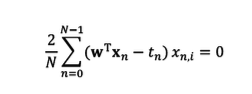

즉 이 D개의 연립 방적식을 각 $w_i$에 대해 풀면 해답을 얻을 수 있습니다.
먼저 양변을 $N/2$배 하여 약간 간단하게 만든 아래 식을 생각해보겠습니다.

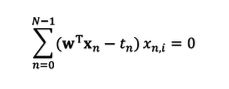

지금까지 $D$를 $D=1, D=2$와 같이 구체적으로 정해 $w$를 도출했는데,
이를 $D$라는 변수의 상태 $w$를 구할 수 있을까요?

여기서 행렬의 사용합니다. 행렬을 사용하면 $D$는 $D$인 채로 답을 낼 수 있습니다.
우선 위의 식 전체를 벡터 형식으로 정리합니다. 위의 식은 모든 $i$에서
성립되므로 각각을 써 나가면 아래와 같습니다.

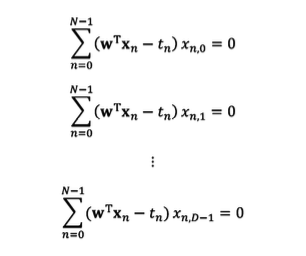

마지막 $x$의 첨자만 0에서 $D-1$까지 변하고 있습니다. 이러한
식을 벡터 하나로 묶어서 아래와 같이 나타낼 수 있습니다.

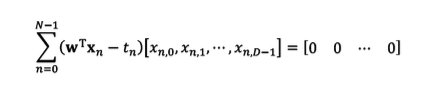

그리고 $[x_{n,0},x_{n,1},\cdots,x_{n,D-1}]$은 ${x_n}^T$이므로, 아래 식과 같습니다.

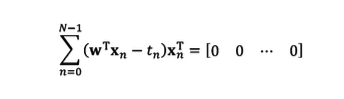

이제 벡터 형식으로 변환했습니다. 행렬도 $(a+b)c = ac+bc$의 분배 법칙이 성립되므로 아래와 같이 확장할 수 있습니다.

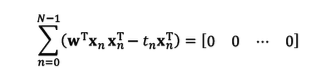

그리고 합을 분해하면

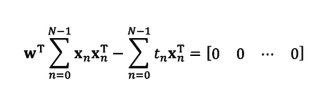

이 좌변은 아래와 같이 행렬의 식으로 나타낼 수 있습니다.

$w^TX^TX - t^TX = [0 0 \cdots 0]$

여기서 X는 모든 데이터를 하난의 행렬로 나타낸 행렬인입니다.

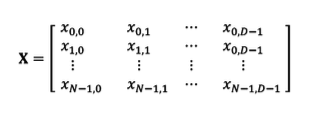



$w^TX^TX - t^TX = [0 0 \cdots 0]$
이 수식을
$\mathbf{w}^T \sum_{n=0}^{N-1} x_n x_n^T - \sum_{n=0}^{N-1} t_n x_n = [0 \dots 0]$
이 수식으로 변환하기 위해 아래의 수식들을 사용합니다.

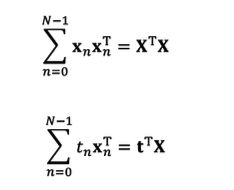

위 두 수식 중 첫번째 수식은 좌변과 우변을 성분 표기의 행려로 하면
모두 아래와 같은 수식처럼 되기 때문에 등호가 성립된다고 볼 수 있습니다.
$N=2, D=2$를 상정하면 확인하기도 편리합니다.

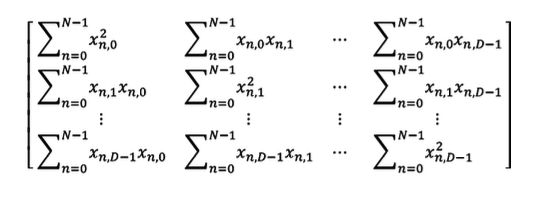

두 번째 수식도 왼쪽과 오른쪽 성분 표기하면 둘 다 아래와 같이 되기 때문에 등호가 성립합니다.

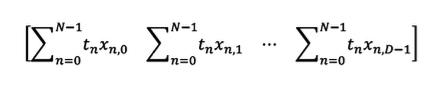

그런데 여기에서는 $w^TX^TX - t^TX = [0 0 \cdots 0]$식을 변형하여 w =의 형태로 가져가는 것을 생각합니다. 먼저 양변을 전치하고,
$(A+B)^T = A^T + B^T$라는 관계식을 사용했습니다.

또한 $(A^T)^T = A$라는 관계식과 $(AB)^T = B^TA^T$ 공식을 사용하면 아래와 같은 식을 얻을 수 있습니다.

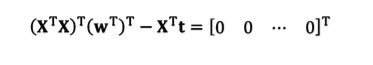

위 $X^Tt$를 우변으로 이동하면

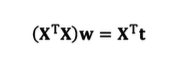

마지막으로 왼쪽의 $(X^TX)$를 지우기 위해서 $(X^TX)^{-1}$양변에 곱하면 아래와 같이 해석해를 얻게 됩니다.

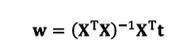

이것이 바로, D차원 선형 회귀 모델의 해가 됩니다.

이 해석해는 x가 어떤 차원이더라도 모두 이 형태에서 최적의 $w$를 얻을 수 있다는 결과입니다.
이 식의 우변$(X^TX)^{-1}X^T$에는 무어-펜로즈 유사 역행렬 Moore-Penrose Rseudoinverse이라는 이름이 붙어 있습니다.
역행렬은 가로와 세로의 길이가 같은 정방행렬로밖에 정의할 수 없었지만, 유사 역행렬은 정방 행렬이 아닌 행렬에 정의할 수 있는 역행렬의 대체 버전으로 구성되어 있습니다.

무어-펜로즈 유사 역행렬을 다음과 같이 정의할 수 있습니다.

$A^+ = lim_{a \to 0}(A^TA + \alpha{I})^{-1}A^T$

무어-펜로즈 유사 역행렬은 다음 4가지 조건을 만족해야합니다.
- $AA^+A = A$
- $A^+AA^+ = A^+$
- $(AA^+)^T = AA^+$
- $(A^+A)^T = A^+A$

SVD로 유사역행렬을 구할 수 있습니다.

$A = UDV^T$
SVD에서 $U$와 $V$는 직교행렬이므로 $U^{-1}=U^T$를 만족합니다. 따라서

$AA^+ = UDV^TA^+$

$(V^T)^{-1}D^+U^{-1}=A^+$

$A^+ = VD^+U^T$

원점에 고정된 면의 방정식은 입력 데이터가 2차원인 경우, 아래식과 같습니다.

$y(x)=w_0x_0+w_1x_1$

여기에 세 번째 매개 변수 $w_2$를 더하면 면을 위아래로 이동할 수 있기 때문에, 원점을 지나지 않는 면을 표현할 수 있습니다.

$y(x)=w_0x_0+w_1x_1+w_2$

그래서 $x$는 2차원 벡터였지만, 항상 1을 얻는 3차원의 요소 $x_2=1$
을 추가하여 $x$를 3차원 벡터라고 생각합니다. 그러면 아래식과 같이 원점
에 얽매이지 않는 면을 표현할 수 있게 됩니다.

$y(x)=w_0x_0+w_1x_1+w_2x_2=w_0x_0+w_1x_1+w_2$

이렇게 항상 1을 취하는 차원을 입력 데이터 $x$에 추가하고 해석해

$w=(X^TX)^{-1}X^Tt$를 적용하여 원점에 얽매이지 않는 면을 구할 수 있습니다.
이것은 $D$차원의 $x$의 문제에 대해서도 마찬가지로, $D+1$번 째 차원에
항상 1을 얻는 요소를 추가하면 자유롭게 움직이는 모델을 표현할 수 있습니다.

$x$가 1차원의 경우로 이야기를 되돌립니다. 여기까지는 직선 모델을 사용하여
키를 예측했습니다. 그러나 데이터를 보면 완만하게 굽은 곡선에 데이터가 함께 있는 것처럼 보입니다. 곡선을 사용하면 오차가 더 작아질 수 있습니다. 이번에는 곡선 모델을 생각해봅시다.

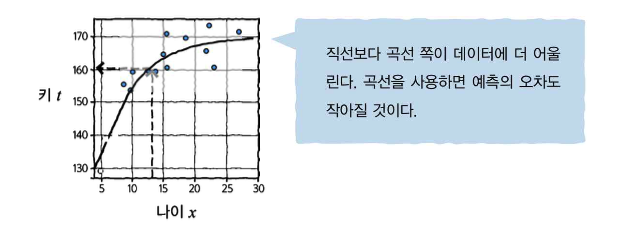

곡선을 나타내는 모델은 여러가지 종류가 있지만, 여기에서는
범용성이 높은 '선형 기저 함수 모델'을 소개합니다.
기저 함수는 '바탕이 되는 함수'라는 뜻입니다. 선형 회기 모델의 $x$를
기저 함수 $\phi(x)$로 대체해 여러 형태의 함수를 만드는 것이 선형 기저 함수 모델의 생각입니다.

여기에서는 가우스 함수를 기저 함수로 선택한 선형 기저 함수 모델을
생각합니다.

기저 함수는 $\phi_j(x)$로 나타냅니다. 기저 함수는 여러 세트에서
사용되기 때문에 그 번호를 나타내는 $J$ 인덱스가 붙어 있습니다.
가우스 기저 함수는 다음과 같습니다.

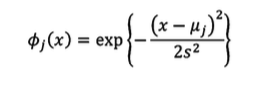

가우스 함수의 중심 위치는 $\mu_j$입니다.
이는 모델의 설계자가 결정하는 매개 변수가 되고 있습니다.
함수의 확장 정도는 $s$로 조절됩니다.
또한 설계자가 결정하는 매개 변수입니다. $s$는 모든 가우스 함수에
공통의 매개 변수로 합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 로드
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [ ]:
# 가우스 함수
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

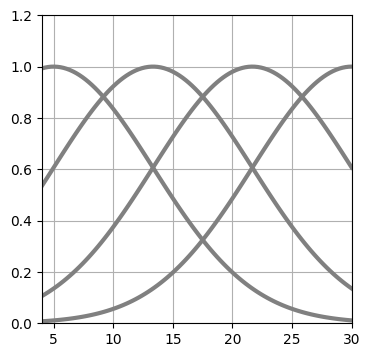

In [ ]:
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
  y = gauss(xb, mu[j], s)
  plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

코드를 실행하면 그래프를 얻을 수 있습니다.

왼쪽에서 순서대로 $\phi_0(x),\phi_1(x),\phi_2(x),\phi_3(x)$이들에 각각 매개 변수 $w_0,w_1,w_2,w_3$을 곱해 모두 합한 함수를 아래와 같이 표기합니다.

$y(x,w)=w_0\phi_0(x),w_1\phi_1(x),w_2\phi_2(x),w_3\phi_3(x)+w_4$

이것이 $M=4$의 선형 기저 함수 모델입니다. 매개 변수 $w$를 '가중치 매개 변수'라고 하며, 이 같은 계산을 '가중치를 붙여 더하면'이라고 표현합니다.
마지막 $w_4$, 즉 $w_M$은 곡선 상하의 평행 이동을 조절하는 중요한 것이지만,
다른 매개 변수와 달리 $\phi_j(x)$가 곱해지지 않았습니다.
그래서 다른 매개 변수와 취급이 다릅니다. 그래서
항상 1을 출력하는 $\phi_4(x) = 1$이라고 하는 더미 dummy기초 함수를 추가할 수 있습니다. 그러면
아래와 같이 깔끔하게 나타낼 수 있습니다.

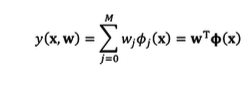

성분 표기와 행렬 표기가 깔끔해졌습니다. 여기서
$w=(w_0,w_1,\dots,w_M)^T, \phi = (\phi_0,\phi_1,\dots,\phi_M)^T$
를 나타냅니다.
평균 제곱 오차 $J$는 다음과 같습니다.

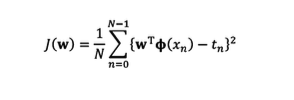

위 식은 이전의 선형 모델의 평균 제곱 오차와 비슷한 모양을 하고 있습니다.

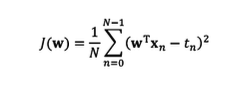

$x_n$이 $\phi(x_n)$으로 바뀌었을 뿐입니다. 이 사실로부터, 선형 기저 함수 모델은 다음과 같이 해석됩니다.

- '전처리'로 1차원 데이터 $x_n$을 $M$차원의 데이터 벡터 $x_n = \phi(x_n)$으로 변환
- M차원 입력 $x_n$에 대해 선형 회귀 모델을 적용

즉, 선형 기저 함수 모델은 $\phi(x_n)$를 입력 $x_n$으로 해석한 선형 회귀 모델과 같습니다.

따라서 $J$를 최소화하는 매개 변수 $w$는 위의 해석해

$w = (X^TX)^{-1}X^Tt$

의 $X$를 $\phi$로 대체한 다음과 같이 나타낼 수 있습니다.

$w = (\phi^T\phi)^{-1}\phi^Tt$

여기서 $\phi$는 전처리를 한 후 입력 데이터를 나타내는, 아래와 같은 행렬이 됩니다.
이를 계획 행렬 design matrix이라고 합니다.

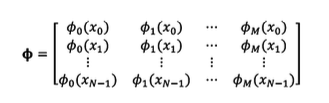

지금 $x$는 1차원인데, 이는 다차원 입력 $x$에도 그대로 확장할 수 있으므로
일반적으로는 아래와 같습니다.

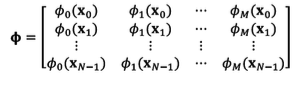

$\phi(x)$에서 $x$가 벡터로 된 점에 주의하세요.

그러면, $w = (\phi^T\phi)^{-1}\phi^Tt$을 사용하여
최적의 매개 변수 $w$를 찾아봅시다. 먼저 선형 기저 함수 모델
gauus_func(w,x)를 정의합니다.

선형 기저 함수는 입력 공간에서 대해서는 비선형 함수이지만,
모델의 출력 $y$가 매개 변수 $w_i$에 선형적으로 의존하므로, 최적화 문제는 매개 변수 공간에서 선형적

In [ ]:
# 선형 기저 함수 모델
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

In [ ]:
# 선형 기저 함수 모델 MSE
# 알고리즘에 직접적인 관계는 없지만 피팅의 수준을 산출함
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
# 선형 기저 함수 모형의 매개 변수의 해석해를 제공하는 함수
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)


    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


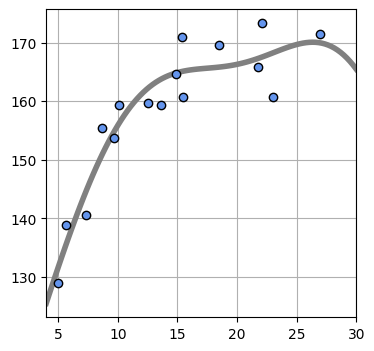

In [ ]:
# 가우스 기저 함수 표시
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

그래프에 선형 기저 함수 모델의 피팅 결과를 나타냈습니다.
항상 1을 출력하는 더미 함수와 앞서 나타낸 4개의 가우스 기저 함수를
합한 결과입니다. 데이터에 따라 곡선이 알맞게 그어져 있습니다.
오차의 표준 편차 SD는 3.98cm으로, 직선 모델 때의 오차 7.00cm보다
훨씬 줄어들었습니다.

기저 함수의 수 M은 어떻게 정할까요?
M을 충분히 크게 하면 어떤 데이터에도 잘 피팅될까요?
아래 코드에서 M = 2,4,7,9의 선형 기저 함수 모델을 사용하여
피팅을 시도해봅시다.

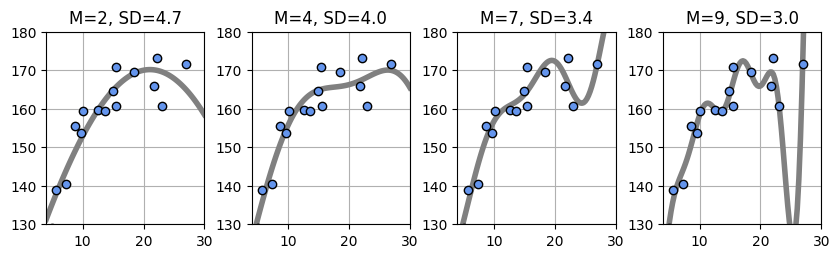

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)


    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


M이 7과 9가 되면 함수가 구부러져 있습니다.
오차도 증가하는지 확이하려고 SD를 보면, M이 증가함에 따라 제대로
줄어들고 있습니다. 얼핏 보면 이상한 느낌이 듭니다.

좀 더 정량적으로 보려면, M=2에서 9까지의 SD를 계산하고 플롯해봅시다.

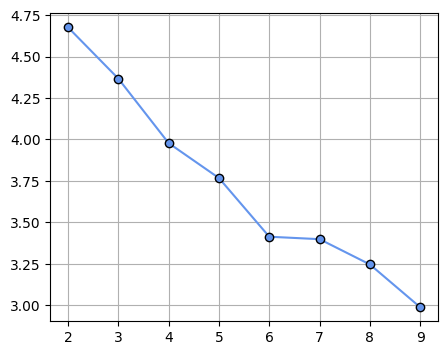

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

$M$이 증가함에 따라 $SD$는 점점 감소하고 있습니다.

M이 증가할수록 선형 기저 함수 모델은
작은 곡선도 표현할 수 있게 되므로 곡선은 데이터
점에 근접하게 되고, 오차(SD)는 점점 감소합니다. 한편, 데이터
점이 없는 곳은 평균 제곱 오차와 관계가 없습니다. 이 때문에
데이터 점이 있는 곳에서 억지로 가늘고 뾰족한 데이터 점에 가까워
지려고 하여, 데이터 점이 없는 곳에서는 뒤틀려 버립니다.

이대로면 상황이 나빠집니다. 데이터 점의 오차는 작아져도, 새 데이터의 예측은 확실히 나빠지기 때문입니다. 이러한 모델의 행동을
과적합(오버피팅 over-fitting)이라고 합니다.

그러면 최적의 M으 어떻게 찾으면 좋을까요?
평균 제곱 오차와 그 제곱근인 SD는 M이 증가하면 점점 감소하는 경향이 있기 때문에
최적의 M을 찾는 기준은 되지 않습니다. 그래서 초심으로 돌아가,
진정한 목적인 새 데이터에 대한 예측의 정확도를 생각합니다.

예를 들어 데이터 X와 t의 4분의 1을 테스트 데이터(test data)로,
나머지 4분의 3을 훈련 데이터(training data)로 나눕니다.
그리고 모델 매개 변수 w는 훈련 데이터만을 사용하여 최적화합니다.
즉, 훈련 데이터의 평균 제곱 오차를 최소화하도록 매개 변수 w를 선택합니다.
그리고 w를 사용하여 테스트 데이터의 평균 제곱 오차(또는 표준 편차 SD)
를 계산하고, M의 평가 기준으로 합니다.
즉, 훈련에 이용하지 않은 미지의 데이터에 대한 오차로 M을 평가하는 것입니다.
이 방법은 홀드 아웃(Holdout)검증이라고 합니다. 어떤 비율로
테스트 데이터와 훈련 데이터를 나누었냐에 따라 결과도 조금 달라지겠지만,
우선 여기에서는 테스트 데이터 비율은 4분의 1로 합시다.

이 방법을 방금 시도한 M = 2,4,7,9의 경우로 피팅해봅시다.

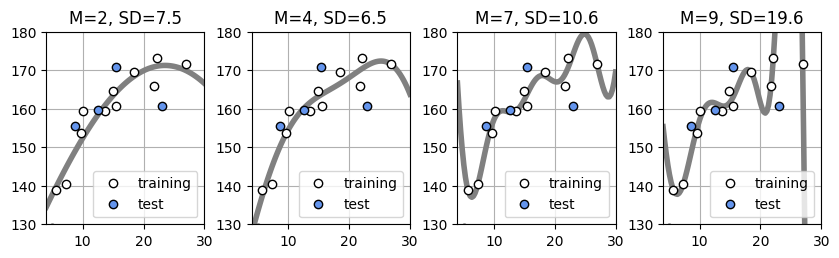

In [ ]:
# 훈련 데이터와 테스트 데이터
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

M이 4,7,9로 증가함에 따라 곡선은 흐물흐물 구부러져 훈련 데이터(흰 점)에 점점 접근해 갑니다. 그러나 피팅에 사용하지 않는 테스트 데이터(파란 점)에서 벗어나는 것처럼 보입니다.

그러면 경향을 정량적으로 보기 위해 M을 2부터 9까지 하나씩 이동하여,
훈련 데이터와 테스트 데이터의 오차(SD)를 플롯해봅시다.

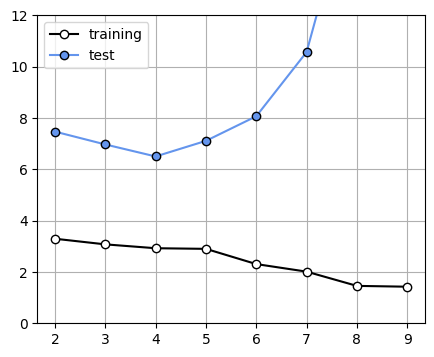

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

M이 늘어나면 훈련 데이터의 오차는 평이하게 감소하지만,
테스트 데이터의 오차는 M=4까지 내려간 뒤 M=5부터 증가하고 있습니다.

즉, "M=5에서 오버피팅이 일어나고 있다." 라고 말할 수 있습니다.
결과적으로 이번 홀드 아웃 검증에서는 M=4인 경우가 가장 데이터에 적합하다는 결론이 되었습니다.

이제 적절한 M을 선택할 수 있게 되었습니다. 이 결과는
테스트 데이터에서 어떤 데이터 점을 선택하느냐에 의존합니다.
데이터 X와 t의 4분의 1을 테스트 데이터(test data)로, 나머지 4분의 3을 훈련 데이터(training data)로 나눕니다. 이 방법을 '분류법 A'로
하고, 다른 4개의 데이터 점을 테스트 데이터로 선택한 경우를 '분류법 B'로
한 피팅 모습을 비교해보면 분류법 B는 분류법 A에 비해 오차(SD)가 많이
커지고 있습니다. 이러한 분류법에 의한 오차의 변동은 데이터 수가
충분히 많아지면 거의 없지만, 예제처럼 데이터 수가 적은 경우에는 두드러집니다.

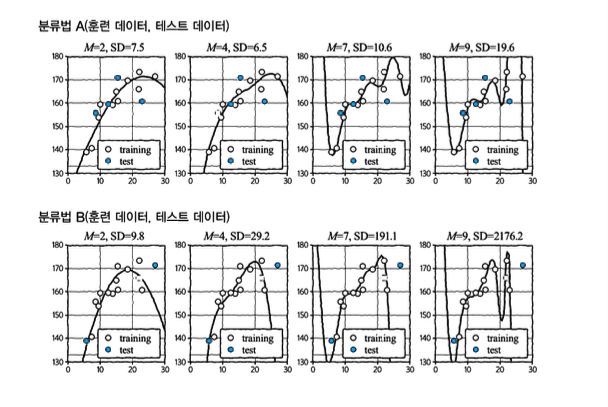

거기에서 이 차이를 최대한 줄이는 교차 검증(Cross-validation)방법을
사용합니다. 다양한 분할엣어 오차를 내고 평균을 계산하는 방법입니다.
데이터를 분할하는 종류의 개수로 K겹 교차 검증(K-fold cross-validation)으로 부르기도 합니다.

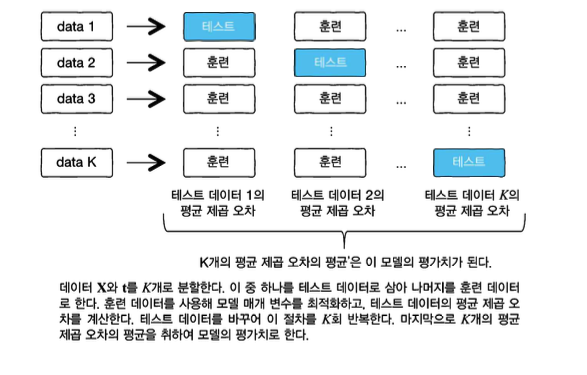

먼저 데이터 X와 t를 K개로 분할아여 첫번째 데이터를 테스트 데이터로,
나머지를 훈련 데이터로 합니다. 훈련 데이터로부터 모델 M의 매개 변수를 구하고,
이 매개 변수를 사용하여 테스트 데이터에서 평균 제곱 오차를 계산합니다.
마찬가지로 두 번째 데이터를 테스트 데이터로 삼고, 나머지를 훈련 데이터로
하여 테스트 데이터의 오차를 계산합니다. 이처럼 절차를 K회 반복하고
마지막에 K개의 평균 제곱 오차의 평균을 계산하여 이 숫자를 이 M의 평가값으로
합니다.

최대 분할 수는 $K = N$입니다. 이때 테스트 데이터의 크기는 1입니다.
이 경우 특별히 LOOCV(leave-one-out-cross-validation)이라고
합니다.
데이터가 적은 경우에 이 방법이 사용됩니다.

먼저 데이터를 K분할아여 각각의 평균 제곱 오차를 출력하는 함수
kfold_gauss_func(x, t, m, k)를 만듭시다.

In [ ]:
# K 분할 교차 검증
def kfold_gauss_func(x, t, m, k):
  n = x.shape[0]
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n), k) != i] # (A) # 0부터 k-1까지를 반복하는 n개의 리스트를 얻을 수 있음
    t_train = t[np.fmod(range(n), k) != i] # (A)
    x_test = x[np.fmod(range(n), k) == i] # (A)
    t_test = t[np.fmod(range(n), k) == i] # (A)
    wm = fit_gauss_func(x_train, t_train, m)
    mse_train[i] = mse_gauss_func(x_train, t_train, wm)
    mse_test[i] = mse_gauss_func(x_test, t_test, wm)
  return mse_train, mse_test

In [ ]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
M = 4 # 기저의 수
K = 4 # 분할 수
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

위쪽이 각각의 분할에서 훈련 데이터의 평균 제곱 오차이며, 아랫쪽이 테스트
데이터에서 평균 제곱 오차입니다. kfold_gauss_func 함수를 사용하여
분할 수를 최대의 16으로 하고, 2에서 7까지의 M으로 오차의 평균을 계산하여
플롯합니다.

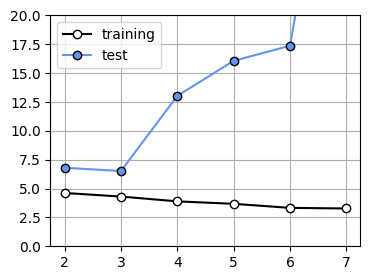

In [ ]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

M=3일 때, 테스트 데이터의 오차가 가장 작은 것을 알 수 있습니다.
즉 LOOCV에서는 M=3이 가장 적합하다는 결론이 나왔습니다.
이 결과는 홀드 아웃 검증과는 다르지만, 그보다 신뢰할 수 있는 결과라고
말할 수 있습니다.

교차 검증은 어디까지나 M을 구하기 위한 방법이며, 모델 매개 변수 w를 구하는 용도가 아닙니다.
이제 M=3이 최적임을 알고 있으므로, 그 모델의 매개 변수 w를 모든 데이터에
사용해 마지막으로 계산합니다. 이 매개 변수 w를 사용한 곡선으로, 미지의 입력 데이터 $x$에 대한 예측 $y$를 출력하면 될 것입니다.

SD=4.37 cm


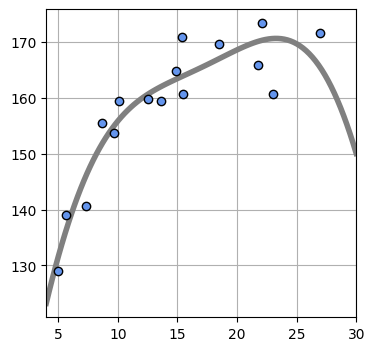

In [ ]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

이번 테스트 데이터 (N=16) 처럼 데이터 수가 적은 경우에는 교차 검증이 유용합니다. 그러나 데이터 수가 많으면 교차 검증은 계산에 시간이 많이 걸립니다. 이 경우에는 홀드 아웃 검증을 사용하면 좋을 것입니다. 데이터 수가 크면 홀드 아웃 검증 결과가 교차 검증과 비슷하게 됩니다.

선형 기저 함수 모델을 도입하여 데이터와의 오차가 많이 개선되었습니다. 그러나 그래프에는 아직 문제가 있습니다.
25세에서 그래프가 급격히 내려간다는 점입니다. 25세가 되면 갑자기 키가
줄어든다는 것은 우리의 상식과 맞지 않습니다.

이것은 30세 주위의 데이터가 충분하지 않았기 때문입니다.
'키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다'는 지식을 모델에
추가하려면 어떻게 하면 될까요?

바로 그 지식에 해당하는 모델을 만들면 됩니다.
나이 $x$가 증가함에 따라 키가 점차 증가하고, 결국에는 일정한 값으로
수렴하는 함수를 만듭니다. 아래와 같은 수식으로 나타낼 수 있습니다.

$y(x) = w_0 - w_1exp(-w_2x)$

$w_0, w_1, w_2$는 모두 양의 값을 취하는 매개 변수입니다.
이 함수를 '모델A'로 부르기로 합시다.

$x$가 증가하면 $exp(-w_2x)$는 0에 접근합니다. 그 결과 1항의 $w_0$만 값을 갖게 됩니다.
즉, $x$가 증가하면 $y$는 $w_0$에 가까워집니다.
$w_0$는 수렴하는 값을 결정하는 매개 변수입니다.

아래에 이 함수의 성질을 그래프로 나타냈습니다. $w_1$은 그래프 시작점을
결정하는 매개 변수이며, $w_2$는 그래프의 기울기를 결정하는 매개 변수로
되어 있습니다.

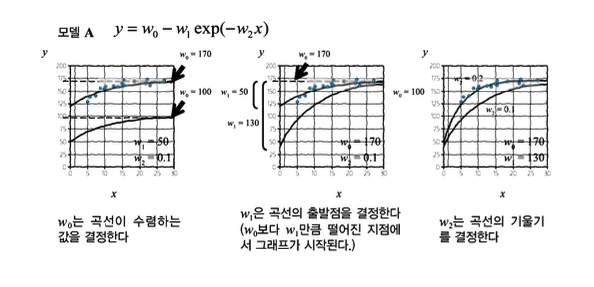

그럼 데이터에 맞는 매개 변수 $w_0, w_1, w_2$를 구합시다.
지금까지와 동일한 방식입니다. 다음의 평균 제곱 오차 $J$가 최소가 되도록
$w_0, w_1, w_2$를 선택합니다

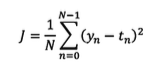

지금까지 경사 하강법을 사용하여 수치적으로 $w$를 구하는 방법과, 해석적으로 도출하는 방법을 소개했습니다.
여기에서는 전자의 '수치 해석'의 라이브러리를 사용하여 찾아봅시다.

함수의 최솟값 또는 최댓값을 구하는 문제는 '최적화 문제'라고 불립니다.
이는 머신러닝뿐 아니라 더 넓은 분야에서 필요하며, 다양한 방법이 제안되어 있습니다.
그래서 최적화 문제를 푸는 라이브러리가 많이 개발되어 있습니다.

여기에서는 파이썬의 scipy.optimize에 포함된 minimize함수를 사용하여
최적 매개 변수를 구해봅니다(참고:https://docs.scipy.org/doc/).
이 함수는 최솟값을 구하는 함수와 매개 변수의 초기 값만 주면, 함수의
미분을 주지 않아도 매개 변수의 극솟값을 출력합니다. 매우 편리합니다.

그러면 모델 A의 정의에서 시작합니다. 모델A를 model_A(x,w)로 정의하고, 표시용 함수 show_model_A(w)과 MSE를 출력하는 함수 mse_model_A(w,x,t)를 정의합니다.

In [ ]:
# 모델 A
def model_A(x, w):
  y = w[0] - w[1] * np.exp(-w[2] * x)
  return y

# 모델 A 표시
def show_model_A(w):
  xb = np.linspace(X_min, X_max, 100)
  y = model_A(xb, w)
  plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# 모델 A의 MSE
def mse_model_A(w, x, t):
  y = model_A(x, w)
  mse = np.mean((y - t)**2)
  return mse

In [ ]:
from scipy.optimize import minimize
# 모델 A의 매개 변수 최적화
def fit_model_A(w_init, x, t):
  res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
  return res1.x

scipy.optimize 최적화 라이브러리의 minimize를 호출합니다.
최적화 함수 fit_model_A(w_init, x, t)의 인수에는 반복 연산을 위한
매개 변수의 초기 값 w_init, 입력 데이터 x, 목표 데이터 t가 들어갑니다.

함수 내부의 아래 부분에서 mse_model_A(w,x,t)를 (부분적으로) 최소화하는 w를 계산합니다.

res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")

첫 번째 인수는 최소화할 목표 함수이며, 두 번재 인수는 w의 초기값, 세 번째 인수는 목표 함수 mse_model_A(w,x,t)를 최적화하는 매개 변수 w 이외의 인수인 x, t입니다. 옵셥으로는 method를 "powell"로 지정하여
구배를 사용하지 않는 최적화 방법인 파웰 알고리즘을 지정합니다.

파웰 알고리즘: 최소화 함수를 사용할 때, 늦게 수렴되거나 수렴이 보장되지 않는 경우 실험적으로 사용하는 알고리즘

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


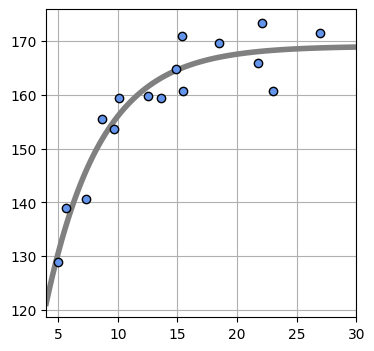

In [ ]:
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

결과를 보면 오차의 SD는 3.86cm으로, 직선 모델 때의 오차 7.00cm보다
당연히 훨씬 적으며, M=3의 선형 기저 함수 모델의 4.32cm에 비해서도
낮은 값이 되었습니다. 그래프는 나이가 들면서 동시에 키가 커지며 일정한 값에서
수렴한다는 그럴듯한 형태가 되었습니다.

지금까지 새로운 모델을 만들어 매개 변수를 최적화하여 데이터에 피팅해봤습니다. 하지만 마무리 작업이 남았습니다. 어떤 모델이 더 좋을지, 모델 간의 비교는 어떻게 할까요?
어느 모델이 좋다고 어떻게 판달할까요?

모델 간의 비교에도 선형 기저 함수의 모델 M을 결정할 때와 같은 생각인, '미지의 데이터에 대한 예측 정확도로 평가한다'는 사고 방식이 유효합니다.
즉, 홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가할 수 있습니다.

다음 코드에서 모델 A의 LOOCV를 실시하여,
선형 기저 함수 모델의 결과와 비교합니다.


Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


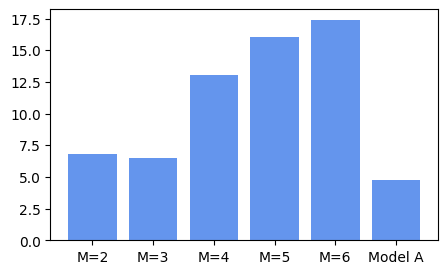

In [ ]:
# 교차 검증 model_A
def kfold_model_A(x, t, k):
  n = len(x)
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n), k) != i]
    t_train = t[np.fmod(range(n), k) != i]
    x_test = x[np.fmod(range(n), k) == i]
    t_test = t[np.fmod(range(n), k) == i]
    wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
    mse_train[i] = mse_model_A(wm, x_train, t_train)
    mse_test[i] = mse_model_A(wm, x_test, t_test)
  return mse_train, mse_test

# 메인
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()

결과를 보면 새롭게 생각한 모델A의 테스트 데이터에 대한 오차의 SD는 4.72cm입니다. M=3의 선형 기저 함수 모델의 오차 SD6.51cm보다 훨씬 작은 것으로 나타났습니다.
즉 "선형 기저 함수 모델 보다 모델A쪽이 데이터에 잘 어울린다."라고 말할수 있습니다.

마지막으로 인공 데이터의 내막을 공개합니다. 선형 기저 함수로
로 만든 인공 데이터는 바로 이 모델에서 생성했습니다. 생성했을 때 매개 변수는$(w_0,w_1,w_2)=(170, 108,0.2)$였습니다. 데이터는 단 16개였지만, 추정된 매개 변수는 $(w_0, w_1,w_2) = (169.0,113.7,0.2)$으로, 꽤
참의 값에 가까운 것이 산출되었습니다.

LOOCV 결과, 새로 생각한 모델 A의 테스트 데이터의
오차(SD: 평균 제곱 오차의 평균 제곱근)는 4.72cm였다. 가장 오차가 작았던 M = 3의 선형 기저 함수 모델의 SD는 6.51cm이라는 점에서 모델 A는 가우스 기저 함수보다 데이터에 적합한 모델이라는 결론을 지을 수 있다.

지도 학습에 의한 해석(모델 선택)의 흐름
이 흐름은 어떠한 고도의 모델을 사용해도 기본적으로는 바뀌지 않습니다.

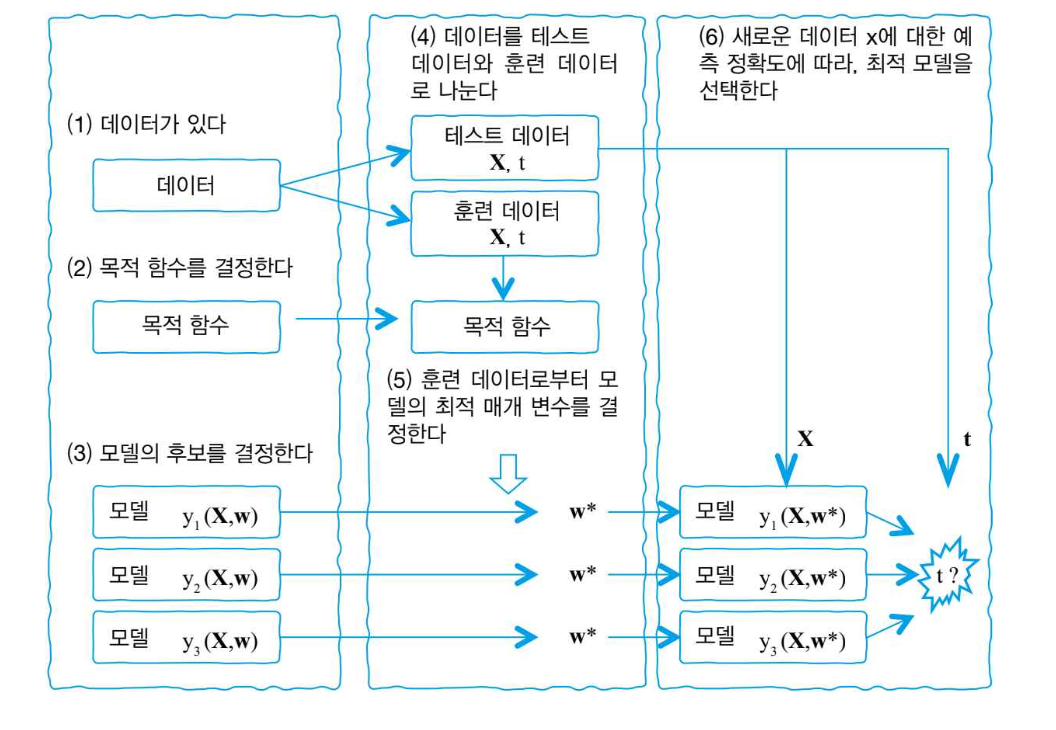

우선, 입력 변수와 목표 변수의 데이터가 있습니다(1).
해석의 목적은 미지의 입력 변수에 대한 목표 변수를 예측하는 모델을 만드는
것입니다. 먼저 무엇을 가지고 예측의 정확도를 높일지,
목적 함수를 결정합니다(2). 이 장에서는 평균 제곱 오차 함수를 사용했지만,
독자적으로 결정해도 괜찮습니다. 예를 들어 다른 확률적 개념을 도입한
'가능도(우도)'라는 생각도 있습니다.

다음으로 모델의 후보를 생각합니다(3). 선형 회귀 모델만으로 적절할지,
곡선 모델도 가능할지, 데이터의 특성을 안다면 이를 도입한 모델을 고안할 수 있는지 등을 생각합니다.

홀드 아웃 검증을 한다면, 데이터를 테스트 데이터와 훈련 데이터로 나누어 둡니다(4).

그리고 훈련 데이터를 사용하여 원하는 함수가 최소(또는 최대)가 되도록
각 모델의 매개 변수 $w^*$을 결정합니다(5).
이 모델 매개 변수를 사용하여 테스트 데이터의 입력 데이터 X에서
목표 데이터 t의 예측을 실시하여 가장 오차가 적은 모델을 선택합니다(6).

모델이 결정되면 보유한 데이터를 모두 사용하여 모델 매개 변수를 최적화합니다.
최적화된 모델이 미지의 입력에 대해 가장 유력한 예측 모델이 됩니다.